### 变量不是盒子
便利贴才是变量的真正用途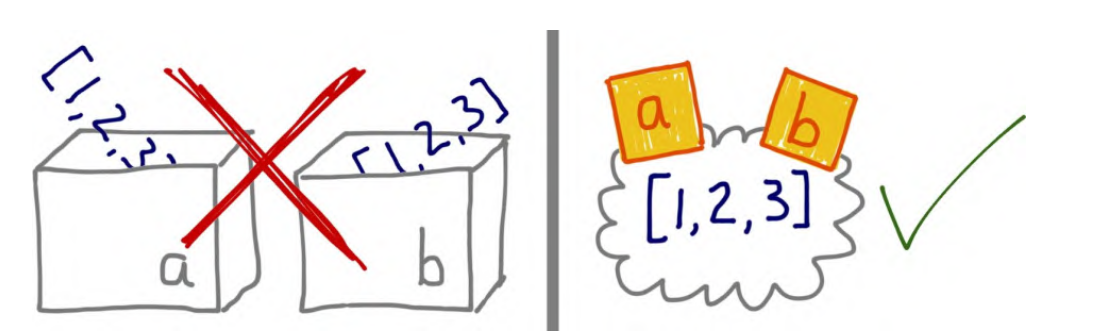
对引用时变量来说，说把变量分配给对象更合理，因为再赋值前，对象就已经创建。

In [ ]:
a = [1,2,3]
b = a# 不是把a中的内容复制一份到b，而是在标注为a的对象上再贴一个标注b
a.append(4)
b

[1, 2, 3, 4]

In [14]:
class Gizmo:
    def __init__(self):
        print(f'Fizmo id: {id(self)}')

x = Gizmo()


Fizmo id: 2613154926944


In [ ]:
y = Gizmo() * 10# 先运行右边

Fizmo id: 2613168159184


TypeError: unsupported operand type(s) for *: 'Gizmo' and 'int'

In [17]:
dir()

['Gizmo',
 'In',
 'Out',
 '_',
 '_1',
 '_10',
 '_16',
 '_3',
 '_4',
 '_6',
 '_7',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'a',
 'b',
 'exit',
 'get_ipython',
 'open',
 'quit',
 'x']

### 同一性，相等性，别名


In [20]:
charles = {'name':'Charles L. Dodgson','born':1832}
lewis = charles
print(lewis is charles)
print(id(charles),id(lewis))
lewis['balance'] = 500
charles

True
2613153107392 2613153107392


{'name': 'Charles L. Dodgson', 'born': 1832, 'balance': 500}

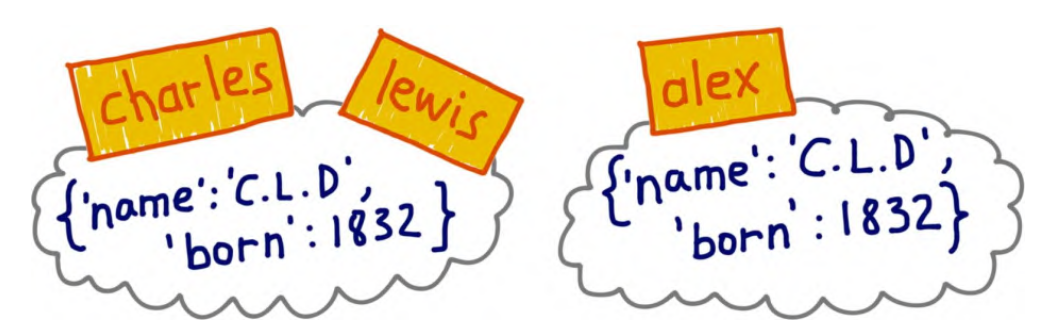
alex 不是别名，lewis是别名

ID 一定是唯一的整数标注,而且在对象的生命周期内绝不会变。

== 运算符比较两个对象的值(对象存储的数据),而 is 比较对象的标识,比较一个变量和一个单例时,应该使用 is。目前,最常使用 is  检查变量绑定的值是不是 None

哨符（Sentinel），也常被称为“哨兵值”或“标记值”，是一个用于表示特殊状态或信号的唯一对象。它的核心作用是作为一个不可能与常规数据混淆的独特标记。

is 运算符比 == 速度快,因为它不能重载,所以 Python 不用寻找要  调用的特殊方法,而是直接比较两个整数 ID

In [ ]:
alex = {'name':'Charles L. Dodgson','born':1832,'balance':500}
print(charles == alex)# dict类的__eq__是这样实现的
alex is charles# 判断是不是同一个，要看id

True


False

In [ ]:
END_OF_DATA = object()
def traverse():
    if node is END_OF_DATA:
        return 
    
    

### 元组的相对不变性
元组与多数 Python 容器(列表、字典、集合等)一样,存储的是对象 的引用。 如果引用的项是可变的,即便元组本身不可变,项依然可以 更改。也就是说,元组的不可变性其实是指 tuple 数据结构的物理内  容(即存储的引用)不可变,与引用的对象无关。

In [24]:
t1 = (1,2,[3,4])
t2 = (1,2,[3,4])
print(t1 == t2)
print(id(t1[-1]))
t1[-1].append(5)
print(t1)
print(id(t1[-1]))
t1 == t2

True
2613154706688
(1, 2, [3, 4, 5])
2613154706688


False

### 默认做浅拷贝
复制列表(或多数内置的可变容器)最简单的方式是使用内置的类型构 造函数

In [32]:
l1 = [3,[55,44],(7,8,9)]
l2 = list(l1)# 创造一个新的对象
print(l2)
print(l2 == l1)
print(l2 is l1)

[3, [55, 44], (7, 8, 9)]
True
False


构造函数或 [:] 做的是浅拷贝(即复制最外层容器,副本中的项  是源容器中项的引用)。如果所有项都是不可变的,那么这种行为没有 问题,而且还能节省内存。但是,如果有可变的项,可能就会导致意想 不到的问题。

In [ ]:
l2[1].append('66')
print(l1)
l2[2] += (10,11)# 元组的+=运算符创建一个新的元组
l1

[3, [55, 44, '66'], (7, 8, 9)]


[3, [55, 44, '66'], (7, 8, 9)]

为任意对象做浅拷贝与深拷贝（副本不共享内部对象的引用）

copy 模块提供的 copy 和 deepcopy 函数分  别对任意对象做浅拷贝和深拷贝。 

In [34]:
class Bus:
    def __init__(self,passengers=None) -> None:
        if passengers is None:
            self.passengers = []
        else:
            self.passengers = list(passengers)

    def pick(self,name):
        self.passengers.append(name)
    def drop(self,name):
        self.passengers.remove(name)

        

In [35]:
import copy

bus1 = Bus(['Alice','Bill','Claire','David'])
bus2 = copy.copy(bus1)
bus3 = copy.deepcopy(bus1)
print(id(bus1),id(bus2),id(bus3))
bus1.drop('Bill')
print(bus2.passengers)
print(id(bus1),id(bus2),id(bus3))
print(bus3.passengers)

2613152807440 2613168281936 2613168282256
['Alice', 'Claire', 'David']
2613152807440 2613168281936 2613168282256
['Alice', 'Bill', 'Claire', 'David']


一般来说,深拷贝不是一件简单的事。如果对象有循环引用,那 么简单的算法会进入无限循环。deepcopy 函数会记住已经复制的对  象,因此能优雅地处理循环引用

In [37]:
a= [1,2]
b=[a,3]
a.append(b)
print(a)
c = copy.deepcopy(a)
c


[1, 2, [[...], 3]]


[1, 2, [[...], 3]]

### 函数的参数是引用时
Python 唯一支持的参数传递模式是共享传参(call by sharing)。
共享传参指函数的形参获得 实参引用的副本。也就是说,函数内部的形参是实参的别名

In [ ]:
def f(a,b):
    a+=b
    return a

x =1
y = 2
print(f(x,y))
print(x,y)# ，整数是不可变对象，数值没变，函数内 a += b 创建了一个新对象，不会影响外部的 x

a = [1,2]
b = [2,3]
print(f(a,b))
print(a,b)# 可变对象，变了，函数内 a += b 直接修改了原列表对象

t =(1,2)
u = (3,4)
print(f(t,u))
print(t,u)# 不可变对象，没变，函数内 a += b 创建了一个新元组，不会影响外部的 t


3
1 2
[1, 2, 2, 3]
[1, 2, 2, 3] [2, 3]
(1, 2, 3, 4)
(1, 2) (3, 4)


不要使用可变类型作为参数的默认值

In [57]:
class HauntedBus:
    def __init__(self,passengers=[]) -> None:
        self.passengers = passengers

    def pick(self,name):
        self.passengers.append(name)
    def drop(self,name):
        self.passengers.remove(name)


没有指定初始乘客的 HauntedBus 实例共享同一个乘客列  表。

In [ ]:
bus1 = HauntedBus(['Alice','Bill'])
print(bus1.passengers)
bus1.pick('Charlie')
bus1.drop('Alice')
print(bus1.passengers)

bus2 = HauntedBus()
bus2.pick('Carrie')
print(id(bus2.passengers))# 这是因为 self.passengers 变成了  passengers 参数默认值的别名

bus3 = HauntedBus()
print(id(bus3.passengers))
bus3.pick('Dave')
print(bus2.passengers)
print(bus2.passengers==bus3.passengers)
print(bus1.passengers)

['Alice', 'Bill']
['Bill', 'Charlie']
2613170524544
2613170524544
['Carrie', 'Dave']
True
['Bill', 'Charlie']


In [59]:
dir(HauntedBus.__init__) # doctest: +ELLIPSIS

['__annotations__',
 '__builtins__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__getstate__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__type_params__']

In [60]:
HauntedBus.__init__.__defaults__

(['Carrie', 'Dave'],)

防御可变参数

In [62]:
class TwilightBus():
    def __init__(self,passengers =None) -> None:
        if passengers ==None:
            self.passengers = []
        else:
            self.passengers = passengers

    def pick(self,name):
        self.passengers.append(name)

    def drop(self,name):
        self.passengers.remove(name)
        

In [ ]:
basketball_team = ['Sue','Tina','Maya','Diana','Pat']
bus = TwilightBus(basketball_team)#self.passengers是passengers的别名，passengers又是basketball_team的别名
bus.drop('Tina')
bus.drop('Pat')
basketball_team

['Sue', 'Maya', 'Diana']

In [65]:
class TwilightBus():
    def __init__(self,passengers =None) -> None:
        if passengers ==None:
            self.passengers = []
        else:
            self.passengers = list(passengers)

    def pick(self,name):
        self.passengers.append(name)

    def drop(self,name):
        self.passengers.remove(name)
        

In [66]:
basketball_team = ['Sue','Tina','Maya','Diana','Pat']
bus = TwilightBus(basketball_team)#self.passengers是passengers的别名，passengers又是basketball_team的别名
bus.drop('Tina')
bus.drop('Pat')
basketball_team

['Sue', 'Tina', 'Maya', 'Diana', 'Pat']

除非方法确实想修改通过参数传入的对象,否则在类中直接把 参数赋值给实例变量之前一定要三思,因为这样会为参数对象创建 别名。如果不确定,那就创建副本,免得给客户添麻烦

### del与垃圾回收
del 不是函数而是语句，del 语句删除引用,而不是对象。del 可能导致对象被当作垃圾  回收,但是仅当删除的变量保存的是对象的最后一个引用时。重新绑定也可能导致对象的引用数量归零,致使对象被销毁。

In [ ]:
a = [1,2]
b = a
del a
print(b)
b = [3]# [1, 2] 的最后一个引用随之删除。现  在,垃圾回收程序可以销毁 [1, 2] 了。

[1, 2]


In [70]:
# 示例 6-16 没有指向对象的引用时,监控对象生命结束时的情形
import weakref
s1 = {1,2,3}
s2 = s1
def bye():
    print('...like tears in the rain.')

ender = weakref.finalize(s1,bye)
print(ender.alive)
del s1
print(ender.alive)
s2 = 'spam'
print(ender.alive)

True
True
...like tears in the rain.
False


Python 对不可变类型施加的把戏

In [72]:
t1 = (1,2,3)
t2 = tuple(t1)
t1 is t2

True

In [73]:
t3 = t1[:]
t2 is t1

True

In [74]:
t1 = (1,2,3)
t2 = (1,2,3)
t1 is t2

False

In [75]:
s1 = 'ABC'
s2 = 'ABC'
s2 is s1

True

共享字符串字面量是一种优化措施,称为驻留(interning).CPython 还会在小的整数上使用这个优化措施,防止重复创建“热门”数值